<a href="https://colab.research.google.com/github/Requenamar3/Data-Mining/blob/main/MBA_Primary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis


#### 1: Simple Transaction Data

In [ ]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
example = [
    ['milk', 'bread', 'apples', 'cereal', 'jelly', 'cookies', 'salad', 'tomatoes'],
    ['beer', 'milk', 'chips', 'salsa', 'grapes', 'wine', 'potatoes', 'eggs', 'carrots'],
    ['diapers', 'baby formula', 'milk', 'bread', 'chicken', 'asparagus', 'cookies'],
    ['milk', 'cookies', 'chicken', 'asparagus', 'broccoli', 'cereal', 'orange juice'],
    ['steak', 'asparagus', 'broccoli', 'chips', 'salsa', 'ketchup', 'potatoes', 'salad'],
    ['beer', 'salsa', 'asparagus', 'wine', 'cheese', 'crackers', 'strawberries', 'cookies'],
    ['chocolate cake', 'strawberries', 'wine', 'cheese', 'beer', 'milk', 'orange juice'],
    ['chicken', 'peas', 'broccoli', 'milk', 'bread', 'eggs', 'potatoes', 'ketchup', 'crackers'],
    ['eggs', 'bread', 'cheese', 'turkey', 'salad', 'tomatoes', 'wine', 'steak', 'carrots'],
    ['bread', 'milk', 'tomatoes', 'cereal', 'chicken', 'turkey', 'chips', 'salsa', 'diapers']
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(example)

[['milk', 'bread', 'apples', 'cereal', 'jelly', 'cookies', 'salad', 'tomatoes'], ['beer', 'milk', 'chips', 'salsa', 'grapes', 'wine', 'potatoes', 'eggs', 'carrots'], ['diapers', 'baby formula', 'milk', 'bread', 'chicken', 'asparagus', 'cookies'], ['milk', 'cookies', 'chicken', 'asparagus', 'broccoli', 'cereal', 'orange juice'], ['steak', 'asparagus', 'broccoli', 'chips', 'salsa', 'ketchup', 'potatoes', 'salad'], ['beer', 'salsa', 'asparagus', 'wine', 'cheese', 'crackers', 'strawberries', 'cookies'], ['chocolate cake', 'strawberries', 'wine', 'cheese', 'beer', 'milk', 'orange juice'], ['chicken', 'peas', 'broccoli', 'milk', 'bread', 'eggs', 'potatoes', 'ketchup', 'crackers'], ['eggs', 'bread', 'cheese', 'turkey', 'salad', 'tomatoes', 'wine', 'steak', 'carrots'], ['bread', 'milk', 'tomatoes', 'cereal', 'chicken', 'turkey', 'chips', 'salsa', 'diapers']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2: Computing Metrics

# **Support**  :  i.e.:  Milk & Bread occur together 4 times in ten tx.  Score: 0.4
# **Confidence**: i.e.: Beer & Wine: Beer TX (3) Wine TX(4): i.e.: every time the customer purchased Beer - they also purchased wine.... 1.  
# **Lift and Leverage**: *a value of lift (other than 1)... means that there is a relationship between items.  when it is greater than 1, the second item is MORE likely to be purchased if the first item is purchased.  Likewise, if the value is less than 1, the second item is LESS likely to be purchased if the first item is purchased.  For instance, if teh lift value is 0.1, the relationship between the two items is STRONG in the NEGATIVE direction.
# **Conviction**:

In [ ]:
# the number of transactions
N = len(example)
# the frequency of milk
f_x = sum(['milk' in i for i in example])
# the frequency of bread
f_y = sum(['bread' in i for i in example])
# the frequency of milk and bread
f_x_y = sum([
    all(w in i for w in ['milk', 'bread'])
    for i in example
])
# print out the metrics computed above
print(
    "N = {}\n".format(N) +
    "Freq(x) = {}\n".format(f_x) +
    "Freq(y) = {}\n".format(f_y) +
    "Freq(x, y) = {}".format(f_x_y)
)

N = 10
Freq(x) = 7
Freq(y) = 5
Freq(x, y) = 4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# support (supp)

support = f_x_y / N
print("Support = {}".format(round(support, 4)))

Support = 0.4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# confidence: x -> y

confidence = support / (f_x / N)
print("Confidence = {}".format(round(confidence, 4)))

Confidence = 0.5714


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# lift: x -> y

lift = confidence / (f_y / N)
print("Lift = {}".format(round(lift, 4)))

Lift = 1.1429


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# leverage: x -> y

leverage = support - ((f_x / N) * (f_y / N))
print("Leverage = {}".format(round(leverage, 4)))

Leverage = 0.05


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# conviction: x -> y

conviction = (1 - (f_y / N)) / (1 - confidence)
print("Conviction = {}".format(round(conviction, 4)))

Conviction = 1.1667


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- **Support** checks how often items are bought together.
- **Confidence** shows how likely you are to buy one item if you've already bought another.
- **Lift** tells you if one item really boosts the sale of another.
- **Leverage** measures extra frequency of buying items together than if they were independent.
- **Conviction** indicates the dependence of one item's purchase on another.

## In order to do a MBA... there must be transactional data
- transaction identifier (like a rcpt, invoice, tx number)
- list of products associated with that identifier
### These are the required elements for a MBA but it can also include
- pricing
- dates
- customer id

--- we will use this dataset:  https://github.com/fenago/datasets/raw/main/Online%20Retail%20(5).xlsx

#### 3: Data Loading

In [ ]:
online = pandas.read_excel(
    io="https://github.com/fenago/datasets/raw/main/Online%20Retail%20(5).xlsx",
    sheet_name="Online Retail",
    header=0
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
online.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
online.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
print("Data dimension (row count, col count): {dim}".format(dim=online.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online.InvoiceNo.nunique()))
print("Count of unique customer ids: {cnt}".format(cnt=online.CustomerID.nunique()))

Data dimension (row count, col count): (541909, 8)
Count of unique invoice numbers: 25900
Count of unique customer ids: 4372


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### 4: Data Cleaning and Formatting

In [ ]:
# If there is a C in the invoice number then that means that it is a "refund"
# create new column called IsCPresent
online['IsCPresent'] = (
# looking for C in InvoiceNo column
    online['InvoiceNo']
# convert column to string type for the apply function below
    .astype(str)
# set element to 1 if C present otherwise 0, this will helpful for step 2
    .apply(lambda x: 1 if x.find('C') != -1 else 0)
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
online.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCPresent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [ ]:
# This is important, you are going to remove all values that are NOT positive, or are 0 or have a "C" in the invoice number.  How you do that is up to you!
# also important, make sure that you DROP any empties

# In order to do a MBA... there must be transactional data
# - transaction identifier (like a rcpt, invoice, tx number)
# - list of products associated with that identifier (in this case, it is invoice number and description)
online1 = (
    online
    # filter out non-positive quantity values
    .loc[online["Quantity"] > 0]
    # remove InvoiceNos starting with C
    .loc[online['IsCPresent'] != 1]
    # column filtering
    .loc[:, ["InvoiceNo", "Description"]]
    # dropping all rows with at least one missing value
    .dropna()
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
online1.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [ ]:
print("Data dimension (row count, col count): {dim}".format(dim=online1.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online1.InvoiceNo.nunique()))

Data dimension (row count, col count): (530693, 2)
Count of unique invoice numbers: 20136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# extract unique invoice numbers as list
invoice_no_list = online1.InvoiceNo.tolist()
invoice_no_list = list(set(invoice_no_list))
print("Length of list of invoice numbers: {ln}".format(ln=len(invoice_no_list)))

Length of list of invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# take subset of invoice number for exercises
subset_invoice_no_list = invoice_no_list[0:5000]
print("Length of subset list of invoice numbers: {ln}".format(ln=len(subset_invoice_no_list)))

Length of subset list of invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# filter data set down to based on
# subset of invoice number list
online1 = online1.loc[online1["InvoiceNo"].isin(subset_invoice_no_list)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [ ]:
online1.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [ ]:
print("Data dimension (row count, col count): {dim}".format(dim=online1.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online1.InvoiceNo.nunique()))

Data dimension (row count, col count): (133313, 2)
Count of unique invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
invoice_item_list = []
for num in list(set(online1.InvoiceNo.tolist())):
    # filter data set down to one invoice number
    tmp_df = online1.loc[online1['InvoiceNo'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)

print(invoice_item_list[1:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]


#### 5: Data Encoding

In [ ]:
# At this point - this is a template... copy and paste...
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)
print(online_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Once you have above... simply encode it... copy and paste code!
online_encoder_df = pandas.DataFrame(
    online_encoder_array,
    columns=online_encoder.columns_
)

# this is a very big table, so for more
# easy viewing only a subset is printed
online_encoder_df.loc[
    4970:4979,
    online_encoder_df.columns.tolist()[0:8]
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,False,False,False,False,False,False
4974,False,False,True,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


In [ ]:
print("Data dimension (row count, col count): {dim}".format(dim=online_encoder_df.shape))

Data dimension (row count, col count): (5000, 3136)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- **Support** checks how often items are bought together.
- **Confidence** shows how likely you are to buy one item if you've already bought another.
- **Lift** tells you if one item really boosts the sale of another.
- **Leverage** measures extra frequency of buying items together than if they were independent.
- **Conviction** indicates the dependence of one item's purchase on another.

#### 6: Apriori Algorithm [Support]

In [ ]:
# default minimum support = 0.5
# does not use colnames (item names)

mod = mlxtend.frequent_patterns.apriori(online_encoder_df)
mod

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets


In [ ]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.05
)
mod_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0110,(1)
1,0.0340,(2)
2,0.0178,(6)
3,0.0126,(10)
4,0.0132,(11)
5,0.0178,(12)
6,0.0276,(13)


In [ ]:
# add colnames for easier interpretability

mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0110,( OVAL WALL MIRROR DIAMANTE )
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0178,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND)
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT)


In [ ]:
# Length is the number of items in the itemsets
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)

mod_colnames_minsupport.loc[180:296]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
180,0.0208,(COFFEE MUG CAT + BIRD DESIGN),1
181,0.0142,(COFFEE MUG DOG + BALL DESIGN),1
182,0.0132,(COFFEE MUG PEARS DESIGN),1
183,0.0240,(COLOUR GLASS T-LIGHT HOLDER HANGING),1
184,0.0224,(COLOURING PENCILS BROWN TUBE),1
...,...,...,...
292,0.0134,(FRYING PAN UNION FLAG),1
293,0.0154,(FULL ENGLISH BREAKFAST PLATE),1
294,0.0148,(FUNKY WASHING UP GLOVES ASSORTED),1
295,0.0344,(GARLAND WOODEN HAPPY EASTER),1


In [ ]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'10 COLOUR SPACEBOY PEN'}
    )
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
2,0.0178,(10 COLOUR SPACEBOY PEN),1


In [ ]:
## ORDER OF ITEMSETS DIFFERS

mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) &
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
889,0.0200,"(6 RIBBONS RUSTIC CHARM, REGENCY CAKESTAND 3 T...",2
950,0.0208,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
1309,0.0200,"(DOTCOM POSTAGE, LUNCH BAG RED RETROSPOT)",2
1516,0.0208,"(HANGING HEART ZINC T-LIGHT HOLDER, SINGLE HEA...",2
1565,0.0206,"(JUMBO BAG RED RETROSPOT, HEART OF WICKER SMALL)",2
1640,0.0204,"(WHITE HANGING HEART T-LIGHT HOLDER, HOME BUIL...",2
1753,0.0206,"(REGENCY CAKESTAND 3 TIER, JAM MAKING SET WITH...",2
1792,0.0206,"(JUMBO BAG OWLS, JUMBO BAG PINK POLKADOT)",2
1879,0.0208,"(JUMBO BAG RED RETROSPOT, RED RETROSPOT CHARLO...",2
1944,0.0204,"(JUMBO STORAGE BAG SUKI, JUMBO BAG WOODLAND AN...",2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


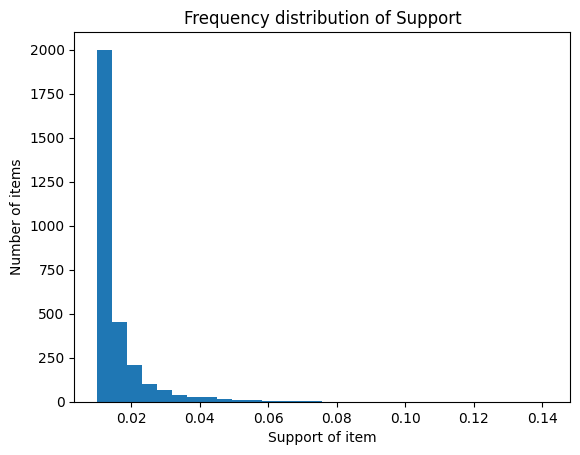

In [ ]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.xlabel("Support of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Support")
plt.show()

#### 7: Association Rules [ Confidence, Lift/Leverage, Conviction]

In [ ]:
## ROW ORDER SLIGHTLY DIFFERENT

rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport,
    metric="confidence",
    min_threshold=0.6,
    support_only=False
)

rules.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0222,0.0276,0.0152,0.684685,24.807416,0.014587,3.083897,0.981478
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0208,0.0546,0.0140,0.673077,12.327416,0.012864,2.891812,0.938399
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0208,0.0520,0.0140,0.673077,12.943787,0.012918,2.899765,0.942344
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0268,0.0546,0.0164,0.611940,11.207698,0.014937,2.436223,0.935857
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0278,0.0546,0.0208,0.748201,13.703323,0.019282,3.754589,0.953533
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0546,0.0520,0.0358,0.655678,12.609186,0.032961,2.753234,0.973866
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0520,0.0546,0.0358,0.688462,12.609186,0.032961,3.034617,0.971195


In [ ]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 1064


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## ORDER OF DF DIFFERENT SLIGHTLY

rules2 = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport,
    metric="lift",
    min_threshold=50,
    support_only=False
)

rules2.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BEADED CRYSTAL HEART PINK ON STICK),(BEADED CRYSTAL HEART GREEN ON STICK),0.0156,0.0126,0.0108,0.692308,54.945055,0.010603,3.209050,0.997359
1,(BEADED CRYSTAL HEART GREEN ON STICK),(BEADED CRYSTAL HEART PINK ON STICK),0.0126,0.0156,0.0108,0.857143,54.945055,0.010603,6.890800,0.994329
2,(CHRISTMAS TREE HEART DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
3,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE HEART DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
4,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE STAR DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
5,(CHRISTMAS TREE STAR DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
6,(CHRISTMAS TREE HEART DECORATION),(CHRISTMAS TREE STAR DECORATION),0.0140,0.0140,0.0122,0.871429,62.244898,0.012004,7.668889,0.997905


In [ ]:
print("Number of Associations: {}".format(rules2.shape[0]))

Number of Associations: 170


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


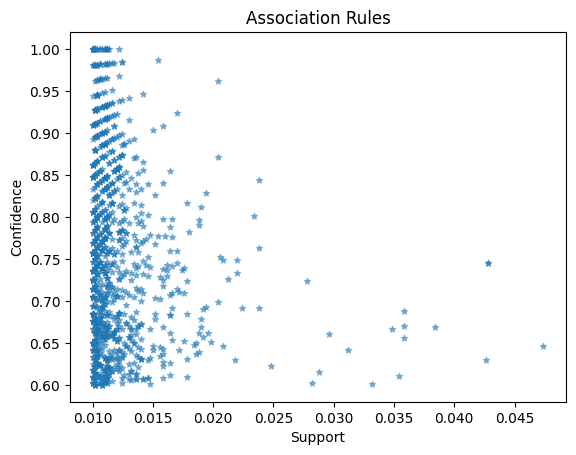

In [ ]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


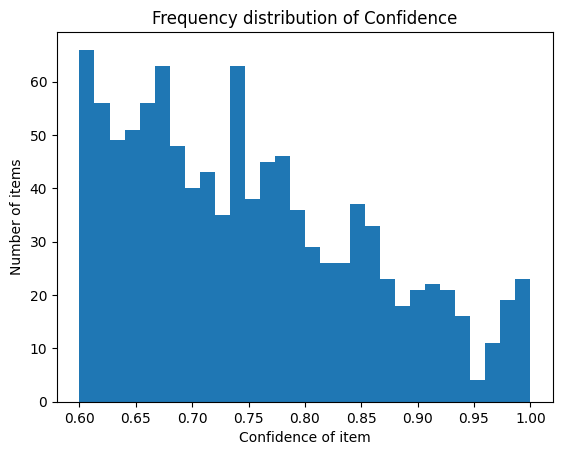

In [ ]:
rules.hist("confidence", grid=False, bins=30)
plt.xlabel("Confidence of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Confidence")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


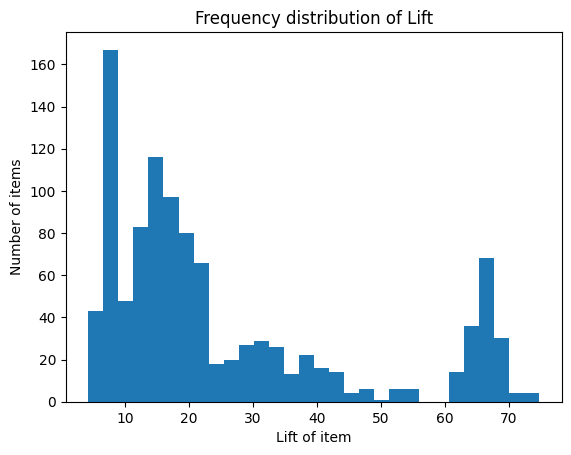

In [ ]:
rules.hist("lift", grid=False, bins=30)
plt.xlabel("Lift of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Lift")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


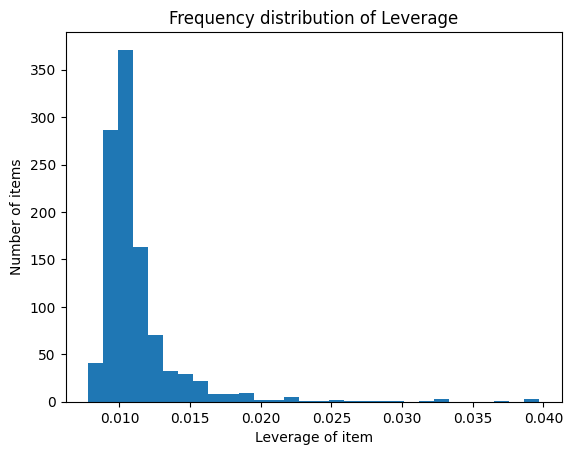

In [ ]:
rules.hist("leverage", grid=False, bins=30)
plt.xlabel("Leverage of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Leverage")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


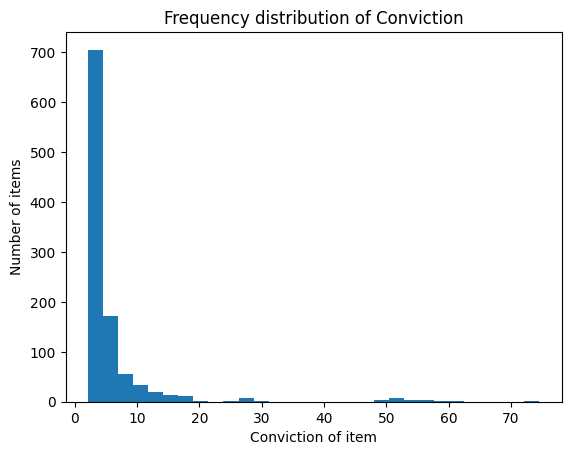

In [ ]:
plt.hist(rules[numpy.isfinite(rules['conviction'])].conviction.values, bins = 30)
plt.xlabel("Conviction of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Conviction")
plt.show()

In [ ]:
!pip install pandas mlxtend openpyxl
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy

In [ ]:
# Load the dataset
url = "https://github.com/fenago/datasets/raw/main/Online%20Retail%20(5).xlsx"
online = pd.read_excel(url, sheet_name="Online Retail", header=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load your original dataset into a DataFrame named 'data'
# Assuming 'online' is your original DataFrame
data = online.copy()

# Step 1: Create a new column 'IsCPresent' to flag refunds
data['IsCPresent'] = data['InvoiceNo'].astype(str).apply(lambda x: 1 if 'C' in x else 0)

# Print output for verification
print("After Step 1 - Flagging Refunds:")
print("Data dimension (row count, col count):", data.shape)
print("Count of unique invoice numbers:", data['InvoiceNo'].nunique())

# Step 2: Remove transactions with zero or negative quantity
data = data[data['Quantity'] > 0]

# Print output for verification
print("\nAfter Step 2 - Filtering Non-Positive Quantities:")
print("Data dimension (row count, col count):", data.shape)
print("Count of unique invoice numbers:", data['InvoiceNo'].nunique())

# Step 3: Remove canceled transactions using the 'IsCPresent' flag
data = data[data['IsCPresent'] == 0]

# Print output for verification
print("\nAfter Step 3 - Removing Refunded Transactions:")
print("Data dimension (row count, col count):", data.shape)
print("Count of unique invoice numbers:", data['InvoiceNo'].nunique())

# Step 4: Select only the 'InvoiceNo' and 'Description' columns
data = data[['InvoiceNo', 'Description']]

# Print output for verification
print("\nAfter Step 4 - Column Filtering:")
print("Data dimension (row count, col count):", data.shape)
print("Count of unique invoice numbers:", data['InvoiceNo'].nunique())

# Step 5: Remove missing values
data.dropna(subset=['InvoiceNo', 'Description'], inplace=True)

# Print output for verification
print("\nAfter Step 5 - Dropping Missing Values:")
print("Data dimension (row count, col count):", data.shape)
print("Count of unique invoice numbers:", data['InvoiceNo'].nunique())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


After Step 1 - Flagging Refunds:
Data dimension (row count, col count): (541909, 9)
Count of unique invoice numbers: 25900

After Step 2 - Filtering Non-Positive Quantities:
Data dimension (row count, col count): (531285, 9)
Count of unique invoice numbers: 20728

After Step 3 - Removing Refunded Transactions:
Data dimension (row count, col count): (531285, 9)
Count of unique invoice numbers: 20728

After Step 4 - Column Filtering:
Data dimension (row count, col count): (531285, 2)
Count of unique invoice numbers: 20728

After Step 5 - Dropping Missing Values:
Data dimension (row count, col count): (530693, 2)
Count of unique invoice numbers: 20136


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
invoice_item_list = []
for num in list(set(data.InvoiceNo.tolist())):
    # Filter dataset down to one invoice number
    tmp_df = data.loc[data['InvoiceNo'] == num]
    # Extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # Append list to invoice_item_list
    invoice_item_list.append(tmp_items)

print(invoice_item_list[1:5])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']]


In [ ]:
# At this point - this is a template... copy and paste...
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)
print(online_encoder_array)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
# Once you have above... simply encode it... copy and paste code!
online_encoder_df = pandas.DataFrame(
    online_encoder_array,
    columns=online_encoder.columns_
)

# this is a very big table, so for more
# easy viewing only a subset is printed
online_encoder_df.loc[
    4970:4979,
    online_encoder_df.columns.tolist()[0:8]
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,False,False,False,False,False,False
4974,False,False,False,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


In [ ]:
# default minimum support = 0.5
# does not use colnames (item names)

mod = mlxtend.frequent_patterns.apriori(online_encoder_df)
mod

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets


In [ ]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.05
)
mod_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.052195,(151)
1,0.072259,(229)
2,0.050407,(1570)
3,0.059644,(1672)
4,0.057708,(1793)
5,0.056267,(1794)
6,0.060489,(1825)


In [ ]:
# add colnames for easier interpretability

mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the Apriori algorithm to find frequent itemsets
mod_colnames_minsupport = apriori(
    online_encoder_df,
    min_support=0.01,  # Minimum support threshold
    use_colnames=True  # Use the actual item names rather than column indices
)

# Sort the itemsets by support in descending order
mod_colnames_minsupport_sorted = mod_colnames_minsupport.sort_values(by='support', ascending=False)

# Display the first few results of the sorted frequent itemsets
print(mod_colnames_minsupport_sorted.head(7))
